<a href="https://colab.research.google.com/github/Mahnytskyy/MN-4-8-Ivan-Mahnytskyy/blob/main/%D0%9B%D0%A02_%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9_%D0%86%D0%B2%D0%B0%D0%BD_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%8220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Лабораторна робота 2.Магницький Іван ФІТ 4-8
# Аналіз даних. Бібліотека Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
gdp_data = tables[2]  # Вибираємо таблицю з відповідними даними


In [104]:
#Виведемо перші 5 рядків
# Видаляємо рядок, де назва країни - 'World'
gdp_data = gdp_data[gdp_data['Country'] != 'World']

gdp_data.head()


,Country,MVF_2024,WorldBank_2023,OON_2022,Deviation,std_dev
1,United States,28781083.0,27360935.0,25744100.0,1420148.0,1.519553e+06
2,China,18532633.0,17794782.0,17963170.0,737851.0,3.866667e+05
3,Germany,4591100.0,4456081.0,4076923.0,135019.0,2.665736e+05
4,Japan,4110452.0,4212945.0,4232173.0,-102493.0,6.543512e+04
5,India,3937011.0,3549919.0,3465541.0,387092.0,2.514106e+05


In [105]:
#Визначимо розмір датасету
gdp_data.shape



(209, 6)

In [106]:
# Визначимо оптимальну кількість стовпців
gdp_data.columns
print(gdp_data.columns)  # Виводимо всі назви стовпців

# Об'єднуємо два рівні MultiIndex в один
gdp_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in gdp_data.columns]

# Перевіряємо результат
print(gdp_data.columns)


Index(['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022', 'Deviation',
       'std_dev'],
      dtype='object')
Index(['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022', 'Deviation',
       'std_dev'],
      dtype='object')


In [107]:
# Змінюємо назви стовпців
gdp_data = gdp_data.rename(columns={
    'Country_Country': 'Country',
    'IMF[1][13]_Forecast': 'MVF_2024',
    'World Bank[14]_Estimate': 'WorldBank_2023',
    'United Nations[15]_Estimate': 'OON_2022'
})

# Виводимо перші рядки для перевірки
gdp_data.head()

,Country,MVF_2024,WorldBank_2023,OON_2022,Deviation,std_dev
1,United States,28781083.0,27360935.0,25744100.0,1420148.0,1.519553e+06
2,China,18532633.0,17794782.0,17963170.0,737851.0,3.866667e+05
3,Germany,4591100.0,4456081.0,4076923.0,135019.0,2.665736e+05
4,Japan,4110452.0,4212945.0,4232173.0,-102493.0,6.543512e+04
5,India,3937011.0,3549919.0,3465541.0,387092.0,2.514106e+05


In [108]:
# Визначимо типи даних
gdp_data.dtypes

,0
Country,object
MVF_2024,float64
WorldBank_2023,float64
OON_2022,float64
Deviation,float64
std_dev,float64


In [109]:
#  Замінюємо значення "—" на NaN і перевіряємо пропущені значення
gdp_data.replace("—", np.nan, inplace=True)
gdp_data.isnull().sum()


,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1
Deviation,19
std_dev,5


In [110]:

# 8. Перевірка наявності дублікатів і видалення їх, якщо є
gdp_data.drop_duplicates(inplace=True)  # Видалення дублікатів
# 9. Виведення описової статистики
gdp_data.describe()


,MVF_2024,WorldBank_2023,OON_2022,Deviation,std_dev
count,1.940000e+02,2.010000e+02,2.080000e+02,1.900000e+02,2.040000e+02
mean,5.644339e+05,5.178115e+05,4.811087e+05,2.397718e+04,2.785134e+04
std,2.528172e+06,2.371920e+06,2.242140e+06,1.224384e+05,1.167611e+05
min,6.600000e+01,6.200000e+01,5.900000e+01,-1.100770e+05,0.000000e+00
25%,1.311450e+04,9.171000e+03,8.600750e+03,1.785000e+02,4.980324e+02
50%,4.630350e+04,3.440100e+04,3.166300e+04,2.022500e+03,2.819903e+03
75%,2.931695e+05,2.534660e+05,2.283972e+05,1.002950e+04,1.507853e+04
max,2.878108e+07,2.736094e+07,2.574410e+07,1.420148e+06,1.519553e+06


In [111]:
# 10. Обчислення відхилень між IMF_2024 та WorldBank_2023 і визначення країн з найбільшими відмінностями

# Заміняємо "—" на NaN
gdp_data.replace("—", np.nan, inplace=True)

# Перетворюємо всі значення в строки, щоб застосувати метод .str
gdp_data['MVF_2024'] = gdp_data['MVF_2024'].astype(str)
gdp_data['WorldBank_2023'] = gdp_data['WorldBank_2023'].astype(str)
gdp_data['OON_2022'] = gdp_data['OON_2022'].astype(str)

# Видаляємо коми і пробіли, замінюємо на NaN, якщо потрібно
gdp_data['MVF_2024'] = gdp_data['MVF_2024'].str.replace(',', '').replace('nan', np.nan).astype(float)
gdp_data['WorldBank_2023'] = gdp_data['WorldBank_2023'].str.replace(',', '').replace('nan', np.nan).astype(float)
gdp_data['OON_2022'] = gdp_data['OON_2022'].str.replace(',', '').replace('nan', np.nan).astype(float)

print(gdp_data.dtypes)

# Віднімання між MVF_2024 і WorldBank_2023
gdp_data['Deviation'] = gdp_data['MVF_2024'] - gdp_data['WorldBank_2023']

# Перевірка результату
print(gdp_data[['Country', 'MVF_2024', 'WorldBank_2023', 'Deviation']].head())

# 11. Кореляція між показниками
correlation = gdp_data[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation)



Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
Deviation         float64
std_dev           float64
dtype: object
         Country    MVF_2024  WorldBank_2023  Deviation
1  United States  28781083.0      27360935.0  1420148.0
2          China  18532633.0      17794782.0   737851.0
3        Germany   4591100.0       4456081.0   135019.0
4          Japan   4110452.0       4212945.0  -102493.0
5          India   3937011.0       3549919.0   387092.0
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999899  0.998964
WorldBank_2023  0.999899        1.000000  0.999285
OON_2022        0.998964        0.999285  1.000000


In [112]:
# 12 Обчислюємо середнє значення для кожного стовпця
mean_values = gdp_data[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

# Виводимо середнє значення
print(mean_values)


MVF_2024          564433.932990
WorldBank_2023    517811.472637
OON_2022          481108.673077
dtype: float64


In [113]:
# 13 Обчислюємо стандартне відхилення показників для кожної країни
gdp_data['std_dev'] = gdp_data[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

# Знаходимо країну з найбільшим стандартним відхиленням
highest_variability = gdp_data[['Country', 'std_dev']].sort_values(by='std_dev', ascending=False)

# Виведемо країну з найбільшим стандартним відхиленням
print(highest_variability.head(1))


         Country       std_dev
1  United States  1.519553e+06


In [114]:
# 14. Визначення країни з найвищим та найнижчим показниками у кожному році:
highest_mvf = gdp_data.loc[gdp_data['MVF_2024'].idxmax()]['Country']
highest_wb = gdp_data.loc[gdp_data['WorldBank_2023'].idxmax()]['Country']
highest_oon = gdp_data.loc[gdp_data['OON_2022'].idxmax()]['Country']

# Знаходимо країну з найнижчим показником у кожному з років
lowest_mvf = gdp_data.loc[gdp_data['MVF_2024'].idxmin()]['Country']
lowest_wb = gdp_data.loc[gdp_data['WorldBank_2023'].idxmin()]['Country']
lowest_oon = gdp_data.loc[gdp_data['OON_2022'].idxmin()]['Country']

# Виведемо результат
print(f"Найвищий показник MVF_2024: {highest_mvf}")
print(f"Найвищий показник WorldBank_2023: {highest_wb}")
print(f"Найвищий показник OON_2022: {highest_oon}")
print(f"Найнижчий показник MVF_2024: {lowest_mvf}")
print(f"Найнижчий показник WorldBank_2023: {lowest_wb}")
print(f"Найнижчий показник OON_2022: {lowest_oon}")

Найвищий показник MVF_2024: United States
Найвищий показник WorldBank_2023: United States
Найвищий показник OON_2022: United States
Найнижчий показник MVF_2024: Tuvalu
Найнижчий показник WorldBank_2023: Tuvalu
Найнижчий показник OON_2022: Tuvalu


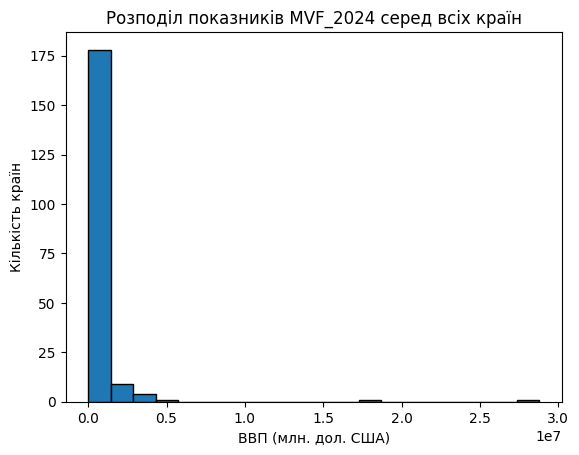

In [115]:
import matplotlib.pyplot as plt

# 15 Створюємо гістограму для MVF_2024
plt.hist(gdp_data['MVF_2024'].dropna(), bins=20, edgecolor='black')

# Додаємо підписи до осей та заголовок
plt.title('Розподіл показників MVF_2024 серед всіх країн')
plt.xlabel('ВВП (млн. дол. США)')
plt.ylabel('Кількість країн')

# Показуємо графік
plt.show()


In [116]:
#16 Обчислюємо загальне значення для кожного року
total_mvf = gdp_data['MVF_2024'].sum()
total_wb = gdp_data['WorldBank_2023'].sum()
total_oon = gdp_data['OON_2022'].sum()

# Обчислюємо частку для кожної країни
gdp_data['Share_MVF_2024'] = gdp_data['MVF_2024'] / total_mvf * 100
gdp_data['Share_WB_2023'] = gdp_data['WorldBank_2023'] / total_wb * 100
gdp_data['Share_OON_2022'] = gdp_data['OON_2022'] / total_oon * 100

# Виведемо результат
gdp_data[['Country', 'Share_MVF_2024', 'Share_WB_2023', 'Share_OON_2022']].head()


,Country,Share_MVF_2024,Share_WB_2023,Share_OON_2022
1,United States,26.284050,26.288343,25.725936
2,China,16.924751,17.097198,17.950496
3,Germany,4.192778,4.281396,4.074047
4,Japan,3.753831,4.047791,4.229187
5,India,3.595438,3.410757,3.463096


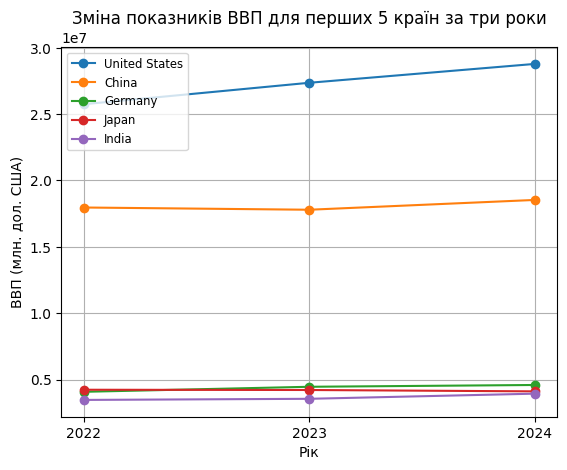

In [119]:
#17 Створимо графіки для кожної країни
# Вибираємо перші 5 країн для візуалізації
top_5_countries = gdp_data['Country'].head(5)

# Створюємо графік для кожної з цих країн
for country in top_5_countries:
    country_data = gdp_data[gdp_data['Country'] == country]

    # Додаємо дані для графіка
    plt.plot(['2022', '2023', '2024'],
             [country_data['OON_2022'].values[0],
              country_data['WorldBank_2023'].values[0],
              country_data['MVF_2024'].values[0]],
             marker='o',
             label=country)

# Додаємо підписи до осей та заголовок
plt.title('Зміна показників ВВП для перших 5 країн за три роки')
plt.xlabel('Рік')
plt.ylabel('ВВП (млн. дол. США)')
plt.xticks(['2022', '2023', '2024'])  # Підписи осі X
plt.legend(loc='upper left', fontsize='small')  # Легенда

# Показуємо графік
plt.grid()
plt.show()
